[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Mask image not found. Using default rectangular WordCloud.


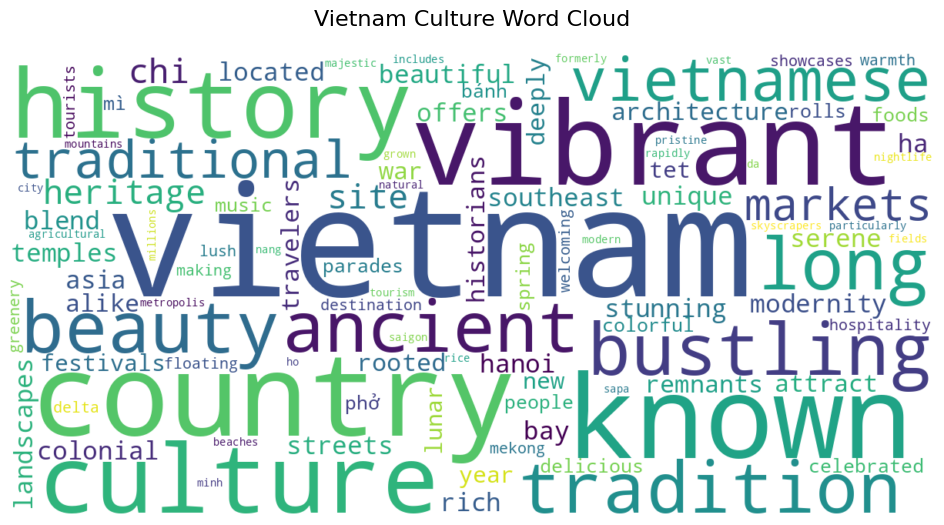

In [2]:
# Import necessary libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Sample text about Vietnam
text = """
Vietnam is a beautiful country located in Southeast Asia, known for its rich history, vibrant culture, and stunning landscapes. From the bustling streets of Hanoi to the serene beauty of Ha Long Bay, Vietnam offers a unique blend of tradition and modernity. The country has a long history, with ancient temples, colonial architecture, and remnants of the Vietnam War that attract historians and travelers alike. Vietnamese culture is deeply rooted in traditions, with festivals like Tet, the Lunar New Year, celebrated with colorful parades, traditional music, and delicious foods like phở, bánh mì, and spring rolls. The people of Vietnam are known for their hospitality and warmth, making it a welcoming destination for tourists. The Mekong Delta, with its floating markets and lush greenery, showcases the country’s agricultural heritage. Ho Chi Minh City, formerly Saigon, is a bustling metropolis with modern skyscrapers and vibrant nightlife. Vietnam’s natural beauty includes majestic mountains, pristine beaches, and vast rice fields, particularly in Sapa and Da Nang. Tourism has grown rapidly, with millions visiting to explore historical sites like the Cu Chi Tunnels and the ancient town of Hoi An, a UNESCO World Heritage Site. Vietnamese coffee, known for its bold flavor, is a must-try for visitors. Whether you’re exploring the vibrant markets, enjoying traditional dance, or cruising along the Perfume River in Hue, Vietnam captivates with its charm and diversity.
"""

# Preprocess text: Tokenize and remove stopwords
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english') + ['is', 'and', 'the', 'of', 'with', 'for', 'in', 'to', 'a', 'its'])
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

# Preprocess the text
processed_text = preprocess_text(text)

# Load mask image (replace 'vietnam_map.png' with your image path)
try:
    mask = np.array(Image.open('vietnam_map.png'))
except FileNotFoundError:
    mask = None
    print("Mask image not found. Using default rectangular WordCloud.")

# Create a WordCloud object
wordcloud = WordCloud(
    width=1200, height=600,
    background_color='white',
    mask=mask,  # Use mask if available
    contour_color='black',  # Outline color for mask
    contour_width=1,
    colormap='viridis',  # Professional color scheme
    font_path=None,  # Use default font or specify a custom font path
    min_font_size=10,
    max_font_size=200,
    max_words=100,
    collocations=False  # Disable bigrams to focus on single words
).generate(processed_text)

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Vietnam Culture Word Cloud', fontsize=16, pad=20)

# Save the WordCloud to a file
wordcloud.to_file('vietnam_wordcloud.png')

# Display the WordCloud
plt.show()